##Import necessary Libraries

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashankpathak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shashankpathak/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
import matplotlib
matplotlib.use('Agg')

## A sentence under consideration for Information Extraction (NER)

In [5]:
sentence = 'Virat Kohli is an Indian cricketer who currently captains the India national team. A right-handed top-order batsman, Kohli is regarded as one of the best batsmen in the world'

## Apply word tokenization and part-of-speech tagging to the sentence

In [6]:
def preprocess(sent):
    sent = word_tokenize(sentence) # TOKENIZE THE SENTENCE
    sent = pos_tag(sent) # GET POS TAG OF THE SENTENCE
    return sent

In [7]:
sent = preprocess(sentence)
sent

[('Virat', 'NNP'),
 ('Kohli', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('Indian', 'JJ'),
 ('cricketer', 'NN'),
 ('who', 'WP'),
 ('currently', 'RB'),
 ('captains', 'VBZ'),
 ('the', 'DT'),
 ('India', 'NNP'),
 ('national', 'JJ'),
 ('team', 'NN'),
 ('.', '.'),
 ('A', 'DT'),
 ('right-handed', 'JJ'),
 ('top-order', 'NN'),
 ('batsman', 'NN'),
 (',', ','),
 ('Kohli', 'NNP'),
 ('is', 'VBZ'),
 ('regarded', 'VBN'),
 ('as', 'IN'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('batsmen', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN')]

## Plot a Parse Tree

In [8]:
%matplotlib inline

In [10]:
import IPython
from IPython.display import display,Image
from nltk.draw.tree import TreeView

pattern = 'NP: {<DT>?<JJ>*<NN>}'
NPChunker = nltk.RegexpParser(pattern) # Regex Parse using the pattern
result = NPChunker.parse(sent)
result.draw()

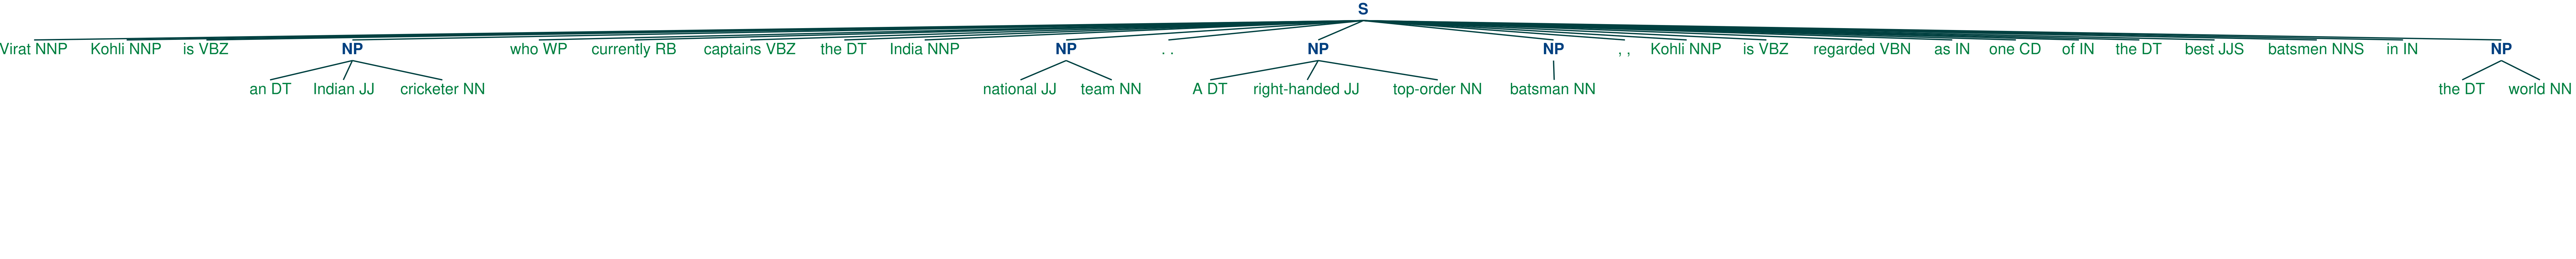

In [14]:
TreeView(result)._cframe.print_to_file('output.ps')
os.system('convert output.ps output.png')
Image(filename='output.png') 

## POS Tags

In [9]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(result)
pprint(iob_tagged)

[('Virat', 'NNP', 'O'),
 ('Kohli', 'NNP', 'O'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('Indian', 'JJ', 'I-NP'),
 ('cricketer', 'NN', 'I-NP'),
 ('who', 'WP', 'O'),
 ('currently', 'RB', 'O'),
 ('captains', 'VBZ', 'O'),
 ('the', 'DT', 'O'),
 ('India', 'NNP', 'O'),
 ('national', 'JJ', 'B-NP'),
 ('team', 'NN', 'I-NP'),
 ('.', '.', 'O'),
 ('A', 'DT', 'B-NP'),
 ('right-handed', 'JJ', 'I-NP'),
 ('top-order', 'NN', 'I-NP'),
 ('batsman', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('Kohli', 'NNP', 'O'),
 ('is', 'VBZ', 'O'),
 ('regarded', 'VBN', 'O'),
 ('as', 'IN', 'O'),
 ('one', 'CD', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('best', 'JJS', 'O'),
 ('batsmen', 'NNS', 'O'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('world', 'NN', 'I-NP')]


**This is how Information is extracted using heuristics based techniques. Try using another pattern.**